# XGBOOST

Tianqi Chen, one of the co-creators of XGBoost, announced (in 2016) that the innovative system features and algorithmic optimizations in XGBoost have rendered it 10 times faster than most sought after machine learning solutions. A truly amazing technique!

##### Boosting consists of three simple steps:
![title](./ML6_notes/01_main_bosting.png)




# 1. Adaboost


In [1]:
#adaboost documentation

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

SyntaxError: invalid syntax (<ipython-input-1-cdb9a71e6e1d>, line 3)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

#loading dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#making model prototype
dt = DecisionTreeClassifier() # we can give our desired parameters
clf = AdaBoostClassifier(n_estimators=10, base_estimator=dt, learning_rate=.1)

#load dataset
dataset = load_breast_cancer()

#split dataset
X_train,X_test,y_train,y_test = train_test_split(dataset.data, dataset.target, random_state=3)

#tain model

clf.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=10, random_state=None)

In [3]:
#test algorithm
clf.score(X_test, y_test)

0.9300699300699301

# 2. Gradient Boost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


Gradient boosting. Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, **typically decision trees.**

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

clf_g=GradientBoostingClassifier(n_estimators=10, learning_rate=.1, max_depth=1)

#taining on same data set
clf_g.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [5]:
#testing
clf_g.score(X_test, y_test)

0.9440559440559441

# 3. XGBOOST

![title](./ML6_notes/14_whatisXGboost.png)

 ![title](./ML6_notes/0123_main_bosting.png)

# Implementation

### 1. XGBoost way

In [6]:
import numpy as np
import xgboost as xgb

###### loading data

XGBoost has its own way to load data

Data needs to be stored in `DMatrix` object which is designed to handle sparse datasets. It can be populated in couple ways:
- using libsvm format txt file,
- using Numpy 2D array (most popular),
- using XGBoost binary buffer file

In this case we'll use first option.

> Libsvm files stores only non-zero elements in format 
> 
> `<label> <feature_a>:<value_a> <feature_c>:<value_c> ... <feature_z>:<value_z>`
>
> Any missing features indicate that it's corresponding value is 0.

In [7]:
dtrain = xgb.DMatrix('data1/agaricus.txt.train')
dtest = xgb.DMatrix('data1/agaricus.txt.test')

[12:21:56] 6513x127 matrix with 143286 entries loaded from data1/agaricus.txt.train
[12:21:56] 1611x127 matrix with 35442 entries loaded from data1/agaricus.txt.test


It consist of 8124 instances, characterized by 22 attributes (both numeric and categorical). The target class is either 0 or 1 which means binary classification problem.

**Important: XGBoost handles only numeric variables.**

Lucily all the data have alreay been pre-process for us or we can process by taking the original data. Categorical variables have been encoded, and all instances divided into train and test datasets. You will know how to do this on your own in later lectures.

###### Displaying Shape of Data

In [8]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

Train dataset contains 6513 rows and 127 columns
Test dataset contains 1611 rows and 127 columns


In [9]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))

print("\nTest possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[0. 1.]

Test possible labels: 
[0. 1.]


### Specify training parameters<a name='params' />
Let's make the following assuptions and adjust algorithm parameters to it:
- we are dealing with binary classification problem (`'objective':'binary:logistic'`),
- we want shallow single trees with no more than 2 levels (`'max_depth':2`),
- we don't any oupout (`'silent':1`),
- we want algorithm to learn fast and aggressively (`'eta':1`),
- we want to iterate only 5 rounds

In [10]:
params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'silent':0,
    'eta':1
}

num_rounds = 5

### Training classifier

In [11]:
bst = xgb.train(params, dtrain, num_rounds)

In [12]:
bst

We can also observe performance on test dataset using **watchlist**

In [13]:
watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.042831	train-error:0.046522
[1]	test-error:0.021726	train-error:0.022263
[2]	test-error:0.006207	train-error:0.007063
[3]	test-error:0.018001	train-error:0.0152
[4]	test-error:0.006207	train-error:0.007063


### Make predictions

In [14]:
preds_prob = bst.predict(dtest)
preds_prob

array([0.08073306, 0.92217326, 0.08073306, ..., 0.98059034, 0.01182149,
       0.98059034], dtype=float32)

Calculate simple accuracy metric to verify the results. Of course validation should be performed accordingly to the dataset, but in this case accuracy is sufficient.

In [15]:
labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0

for i in range(len(preds)):
    if (labels[i] == preds[i]):
        correct += 1
        
print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))

Predicted correctly: 1601/1611
Error: 0.0062


In [16]:
preds

array([False,  True, False, ...,  True, False,  True])

## 2.Using Scikit-learn Interface
alternative approach for using XGBoost algorithm.

In [17]:
from sklearn.datasets import load_svmlight_files    
from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier

### Loading data<a name='data' />
We are going to use the same dataset as in previous lecture. The scikit-learn package provides a convenient function `load_svmlight` capable of reading many libsvm files at once and storing them as Scipy's sparse matrices. 

In [18]:
X_train, y_train, X_test, y_test = load_svmlight_files(('data1/agaricus.txt.train', 'data1/agaricus.txt.test'))

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6513, 126)
(1611, 126)
(6513,)
(1611,)


In [20]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [21]:
#we can display
print(X_train)

  (0, 2)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 20)	1.0
  (0, 29)	1.0
  (0, 33)	1.0
  (0, 35)	1.0
  (0, 39)	1.0
  (0, 40)	1.0
  (0, 52)	1.0
  (0, 57)	1.0
  (0, 64)	1.0
  (0, 68)	1.0
  (0, 76)	1.0
  (0, 85)	1.0
  (0, 87)	1.0
  (0, 91)	1.0
  (0, 94)	1.0
  (0, 101)	1.0
  (0, 104)	1.0
  (0, 116)	1.0
  (0, 123)	1.0
  (1, 2)	1.0
  (1, 9)	1.0
  (1, 19)	1.0
  :	:
  (6511, 106)	1.0
  (6511, 114)	1.0
  (6511, 120)	1.0
  (6512, 2)	1.0
  (6512, 9)	1.0
  (6512, 10)	1.0
  (6512, 21)	1.0
  (6512, 28)	1.0
  (6512, 31)	1.0
  (6512, 35)	1.0
  (6512, 38)	1.0
  (6512, 51)	1.0
  (6512, 52)	1.0
  (6512, 60)	1.0
  (6512, 64)	1.0
  (6512, 68)	1.0
  (6512, 73)	1.0
  (6512, 82)	1.0
  (6512, 87)	1.0
  (6512, 90)	1.0
  (6512, 94)	1.0
  (6512, 101)	1.0
  (6512, 109)	1.0
  (6512, 114)	1.0
  (6512, 120)	1.0


#### Specify training parameter in sklearn way

In [22]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 5
}

#### Train model in sklearn way

In [23]:
bst = XGBClassifier(**params).fit(X_train, y_train)

In [24]:
bst

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1.0,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=5, n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=1)

In [25]:
preds = bst.predict(X_test)
preds

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0., 1., 0., ..., 1., 0., 1.])

In [26]:
correct = 0

for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(y_test, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-acc))

Predicted correctly: 1601/1611
Error: 0.0062


# Model Evalaution

XGBOOST way

using average learning rate 0.5

In [27]:
# specify general training parameters
params = {
    'objective':'binary:logistic',
    'max_depth':1,
    'silent':1,
    'eta':0.5
}

num_rounds = 5

watchlist  = [(dtest,'test'), (dtrain,'train')]

### Using predefined evaluation metrics<a name='pmetrics' />

#### What is already available?
There are already some predefined metrics availabe. You can use them as the input for the `eval_metric` parameter while training the model.

- `rmse` - [root mean square error](https://www.wikiwand.com/en/Root-mean-square_deviation),
- `mae` - [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error?oldformat=true),
- `logloss` - [negative log-likelihood](https://en.wikipedia.org/wiki/Likelihood_function?oldformat=true)
- `error` - binary classification error rate. It is calculated as `#(wrong cases)/#(all cases)`. Treat predicted values with probability $p > 0.5$ as positive,
- `merror` - multiclass classification error rate. It is calculated as `#(wrong cases)/#(all cases)`,
- `auc` - [area under curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic?oldformat=true),
- `ndcg` - [normalized discounted cumulative gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain?oldformat=true),
- `map` - [mean average precision](https://en.wikipedia.org/wiki/Information_retrieval?oldformat=true)

By default an `error` metric will be used.

In [28]:
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.11049	train-error:0.113926
[1]	test-error:0.11049	train-error:0.113926
[2]	test-error:0.03352	train-error:0.030401
[3]	test-error:0.027312	train-error:0.021495
[4]	test-error:0.031037	train-error:0.025487


To change is simply specify the `eval_metric` argument to the `params` dictionary.

In [29]:
params['eval_metric'] = ['logloss', 'auc']
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-logloss:0.457893	test-auc:0.892138	train-logloss:0.460117	train-auc:0.888997
[1]	test-logloss:0.383914	test-auc:0.938901	train-logloss:0.378727	train-auc:0.942881
[2]	test-logloss:0.312679	test-auc:0.976157	train-logloss:0.308074	train-auc:0.981415
[3]	test-logloss:0.269116	test-auc:0.979685	train-logloss:0.261396	train-auc:0.985158
[4]	test-logloss:0.239746	test-auc:0.9785	train-logloss:0.232171	train-auc:0.983744


# Creating custom evaluation metric
we can create own custom evaluation matrix

In [30]:
# custom evaluation metric
def misclassified(pred_probs, dtrain):
    labels = dtrain.get_label() # obtain true labels
    preds = pred_probs > 0.5 # obtain predicted values
    return 'misclassified', np.sum(labels != preds)

In [31]:
bst = xgb.train(params, dtrain, num_rounds, watchlist, feval=misclassified, maximize=False)

[0]	test-logloss:0.457893	test-auc:0.892138	train-logloss:0.460117	train-auc:0.888997	test-misclassified:178	train-misclassified:742
[1]	test-logloss:0.383914	test-auc:0.938901	train-logloss:0.378727	train-auc:0.942881	test-misclassified:178	train-misclassified:742
[2]	test-logloss:0.312679	test-auc:0.976157	train-logloss:0.308074	train-auc:0.981415	test-misclassified:54	train-misclassified:198
[3]	test-logloss:0.269116	test-auc:0.979685	train-logloss:0.261396	train-auc:0.985158	test-misclassified:44	train-misclassified:140
[4]	test-logloss:0.239746	test-auc:0.9785	train-logloss:0.232171	train-auc:0.983744	test-misclassified:50	train-misclassified:166


https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

# TODO

In [32]:
# the dataset information https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

In [34]:
import numpy as np

# loading  data

In [35]:
df = pd.read_csv('./todo_data/risk_factors_cervical_cancer.csv')
df.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Age,18,15,34,52,46,42,51,26,45,44,44,27,45,44,43
Number of sexual partners,4.0,1.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,4.0,2.0,2.0
First sexual intercourse,15.0,14.0,?,16.0,21.0,23.0,17.0,26.0,20.0,15.0,26.0,17.0,14.0,25.0,18.0
Num of pregnancies,1.0,1.0,1.0,4.0,4.0,2.0,6.0,3.0,5.0,?,4.0,3.0,6.0,2.0,5.0
Smokes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Smokes (years),0.0,0.0,0.0,37.0,0.0,0.0,34.0,0.0,0.0,1.266972909,0.0,0.0,0.0,0.0,0.0
Smokes (packs/year),0.0,0.0,0.0,37.0,0.0,0.0,3.4,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0
Hormonal Contraceptives,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
Hormonal Contraceptives (years),0.0,0.0,0.0,3.0,15.0,0.0,0.0,2.0,0.0,0.0,2.0,8.0,10.0,5.0,0.0
IUD,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,?,0.0,0.0,1.0,0.0,1.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [37]:
# Data Containing '?' of no use so converting to nan
df.replace('?', np.nan, inplace=True)

In [38]:
df.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Age,18,15,34,52,46,42,51,26,45,44,44,27,45,44,43,40,41,43,42,40
Number of sexual partners,4.0,1.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,4.0,2.0,2.0,3.0,4.0,3.0,2.0,2.0
First sexual intercourse,15.0,14.0,NaN,16.0,21.0,23.0,17.0,26.0,20.0,15.0,26.0,17.0,14.0,25.0,18.0,18.0,21.0,15.0,20.0,27.0
Num of pregnancies,1.0,1.0,1.0,4.0,4.0,2.0,6.0,3.0,5.0,NaN,4.0,3.0,6.0,2.0,5.0,2.0,3.0,8.0,NaN,NaN
Smokes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Smokes (years),0.0,0.0,0.0,37.0,0.0,0.0,34.0,0.0,0.0,1.266972909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Smokes (packs/year),0.0,0.0,0.0,37.0,0.0,0.0,3.4,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hormonal Contraceptives,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
Hormonal Contraceptives (years),0.0,0.0,0.0,3.0,15.0,0.0,0.0,2.0,0.0,0.0,2.0,8.0,10.0,5.0,0.0,15.0,0.25,3.0,7.0,0.0
IUD,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [39]:
# Explicitly checking NaN
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [40]:
df.shape

(858, 36)

In [41]:
features= list(df.columns)

In [42]:
#Printing the null % above 75 and drop those features
for item in features:
    nul= (df[item].isnull().sum())/df.shape[0]
    if nul > .75:
        print('Null % in {}:= {:.2f}'.format(item, nul))
        df.drop(item, inplace=True, axis=1)


Null % in STDs: Time since first diagnosis:= 0.92
Null % in STDs: Time since last diagnosis:= 0.92


In [43]:
# now find the maximum null percent in all remaing feature values
features= list(df.columns)
max_null=[]
for item in features:
    nul= (df[item].isnull().sum())/df.shape[0]
    max_null.append(nul)

print(round(max(max_null), 2))
    

0.14


Obsevation: 14% is not so significant so we can conver nan to 0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

as we can observe most of features are of type object, even though conataing numerical data, and we know most of our boosting including XGBoost only works on numerical data, so we need to convert all into float64

In [45]:
# type of each panda frame feature would be a series
type_f=[]
for item in features:
    t = type(df[item])
    type_f.append(t)

print(type_f)
    

[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, 

In [46]:
# data type in each column
type_f=[]
for item in features:
    t = np.dtype(df[item])
    type_f.append(t)

print(type_f)

#we also can check the same with df.dtypes

[dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


In [47]:
#conversion to numeric
#we can apply iteratively serieswise
#pd.to_numeric(series, errors='coerce').fillna(0, downcast='infer')

# covert full frame in one go
df2 = df.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

`downcast='infer'` is used to covert in minimum type `int64` where possible,

In [48]:
# checking `dtypes` to ensure all numeric
df2.dtypes

Age                                     int64
Number of sexual partners               int64
First sexual intercourse                int64
Num of pregnancies                      int64
Smokes                                  int64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                 int64
Hormonal Contraceptives (years)       float64
IUD                                     int64
IUD (years)                           float64
STDs                                    int64
STDs (number)                           int64
STDs:condylomatosis                     int64
STDs:cervical condylomatosis            int64
STDs:vaginal condylomatosis             int64
STDs:vulvo-perineal condylomatosis      int64
STDs:syphilis                           int64
STDs:pelvic inflammatory disease        int64
STDs:genital herpes                     int64
STDs:molluscum contagiosum              int64
STDs:AIDS                         

In [49]:
# no null values now as the maximum of 14% of nan was converted to 0
df2.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [50]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.00,32.0,84.0
Number of sexual partners,858.0,2.451049,1.698528,0.0,1.0,2.00,3.0,28.0
First sexual intercourse,858.0,16.856643,3.183491,0.0,15.0,17.00,18.0,32.0
Num of pregnancies,858.0,2.127040,1.508108,0.0,1.0,2.00,3.0,11.0
Smokes,858.0,0.143357,0.350641,0.0,0.0,0.00,0.0,1.0
Smokes (years),858.0,1.201241,4.060623,0.0,0.0,0.00,0.0,37.0
Smokes (packs/year),858.0,0.446278,2.210351,0.0,0.0,0.00,0.0,37.0
Hormonal Contraceptives,858.0,0.560606,0.496603,0.0,0.0,1.00,1.0,1.0
Hormonal Contraceptives (years),858.0,1.972394,3.597888,0.0,0.0,0.25,2.0,30.0
IUD,858.0,0.096737,0.295771,0.0,0.0,0.00,0.0,1.0


#### ploting histogram for full df

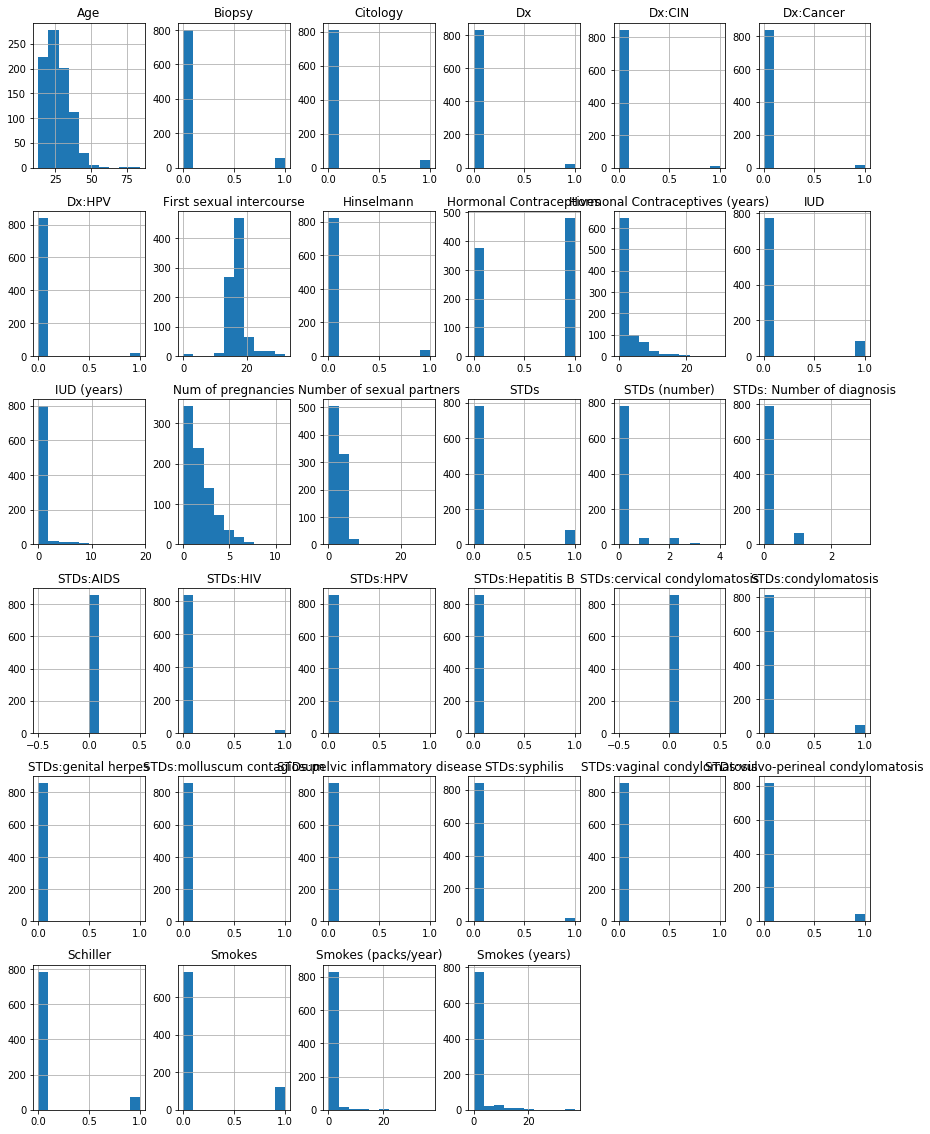

In [51]:
%matplotlib inline
df2.hist(figsize=(15,20))
plt.show()

Observation: most of features are binary boolean (having values 0 and 1 only )

### Ploting the target variables(accoring to dataset description)

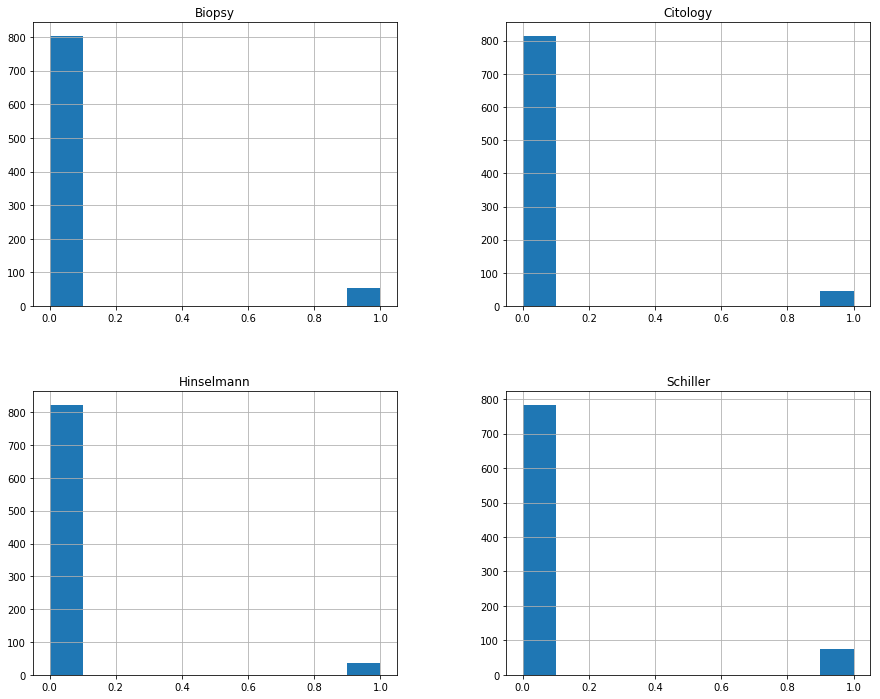

In [52]:
#plot it with seaborn pairplot to see density 

df2.hist(column=['Hinselmann', 'Schiller','Citology', 'Biopsy'], figsize=(15,12))  

plt.show()

### Data Prepration, Model Building and training 

In [53]:

X=df2[df2.columns[:-4]]
#y=df2[df2.columns[-4:]]
y = df2['Hinselmann']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, test_size=.3)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 30), (258, 30), (600,), (258,))

# 1. Adaboost model

In [56]:

dt = DecisionTreeClassifier() # we can give our desired parameters
clf = AdaBoostClassifier(n_estimators=10, base_estimator=dt, learning_rate=.1)

clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=10, random_state=None)

In [57]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [58]:
clf.score(X_test, y_test)

0.9302325581395349

# 2. Gradient Boost Algo model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

clf_g=GradientBoostingClassifier(n_estimators=10, learning_rate=.1)

#taining on same data set
clf_g.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
clf_g.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
clf_g.score(X_test, y_test)

0.9457364341085271

##### using kfold 

In [62]:
#experiment1
kfold = KFold(n_splits=10, random_state=3)
result=cross_val_score(clf_g, X, y, cv=kfold)

NameError: name 'KFold' is not defined

In [ ]:
result.mean()  #which is comparable to above one- over the unseen data

In [ ]:
#experiment2 with a new model
kfold = KFold(n_splits=15, random_state=3)
clf_g1= GradientBoostingClassifier(n_estimators=10,  learning_rate=.33)
result=cross_val_score(clf_g1, X, y, cv=kfold)

In [ ]:
result.mean()

##### using stratifiedfold

In [ ]:
#experiment1 with a new model
from sklearn.model_selection import StratifiedKFold
Sfold = StratifiedKFold(n_splits=15, random_state=3)
result=cross_val_score(clf_g1, X, y, cv=Sfold)

In [ ]:
result

In [ ]:
result.mean()

# Combining multiple Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier


#list of estimators
estimators = []

#creating different model and appending them to estimators list
#1.
model_lr= LogisticRegression()
estimators.append(('LogisticRegressionModel', model_lr))

#2.
model_DT = DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifierModel',model_DT))

#3.
model_svm = SVC()
estimators.append(('svmModel', model_svm))

#4.
model_rf=RandomForestClassifier()
estimators.append(('RandomForestClassifierModel',model_rf))

#5.
model_gb = GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifierModel', model_gb))

#6.
model_xgb = XGBClassifier()
estimators.append(('XGB',model_xgb))

#creating ensemble model

ensembleModel=VotingClassifier(estimators)



estimators


**Observation:** we can also provide several parameters to diff. models to optimize

#### Training and Testing Models

In [ ]:
from sklearn.metrics import log_loss

#1.
model_lr.fit(X_train, y_train)
pred1=model_lr.predict(X_test)

print("1. LogisticRegression:")
print("Accuracy:",accuracy_score(y_test, pred1))
print('log_loss:',log_loss(y_test, pred1))

#2.
model_DT.fit(X_train, y_train)
pred2 = model_DT.predict(X_test)

print("\n2. DecisionTreeClassifier:")
print("Accuracy:",accuracy_score(y_test, pred2))
print('log_loss:',log_loss(y_test, pred2))

#3.
model_gb.fit(X_train, y_train)
pred3 = model_gb.predict(X_test)

print("\n3. GradientBoostingClassifier:")
print("Accuracy:",accuracy_score(y_test, pred3))
print('log_loss:',log_loss(y_test, pred3))


#4.
model_rf.fit(X_train, y_train)
pred4 = model_rf.predict(X_test)

print("\n4. RandomForestClassifier:")
print("Accuracy:",accuracy_score(y_test, pred4))
print('log_loss:',log_loss(y_test, pred4))



#5.
model_svm.fit(X_train, y_train)
pred5 = model_svm.predict(X_test)

print("\n5. SVC:")
print("Accuracy:",accuracy_score(y_test, pred5))
print('log_loss:',log_loss(y_test, pred5))


#6.
model_xgb.fit(X_train, y_train)
pred6 = model_xgb.predict(X_test)

print("\n6. XGBClassifier:")
print("Accuracy:",accuracy_score(y_test, pred6))
print('log_loss:',log_loss(y_test, pred6))

In [ ]:

#6. using ensemble model

ensembleModel.fit(X_train, y_train)
predEn = ensembleModel.predict(X_test)

print("\n6. VotingClassifier:")
print("Accuracy:",accuracy_score(y_test, predEn))
print('log_loss:',log_loss(y_test, predEn))



#Using kfold

kfold = KFold(n_splits=10, random_state=3)
result= cross_val_score(ensembleModel, X,y, cv=kfold)
result.mean()


#printing ensemble
print(ensembleModel)

# 3. XGBoost

In [ ]:
import xgboost as xgb


In [ ]:
print("training a XGBoost classifier\n")
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)

In [ ]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

In [ ]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))

print("\nTest possible labels: ")
print(np.unique(dtest.get_label()))

In [ ]:
param = {'max_depth':2, 
         'eta':.1, 
         'objective':'binary:logistic', 
         'eval_metric': 'error'}
num_rounds = 5
clf_xgb = xgb.train(param, dtrain, num_rounds)  #Desired model

In [ ]:
watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
bst = xgb.train(param, dtrain, num_rounds, watchlist)

In [ ]:
preds_prob = bst.predict(dtest)
#preds_prob

Calculate simple accuracy metric to verify the results

In [ ]:
labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0

for i in range(len(preds)):
    if (labels[i] == preds[i]):
        correct += 1
        
print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

### sklearn way

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 5
}

In [ ]:
bst = XGBClassifier(**params).fit(X_train, y_train)

In [ ]:
bst

In [ ]:
preds = bst.predict(X_test)
preds

In [ ]:
accuracy_score(y_test, preds)

##### Using Kfold and coss_val

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
newdtrain = xgb.DMatrix(X.values, label=y.values)
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 10
}
result =xgb.cv(params, newdtrain, nfold=3)


In [ ]:
result

In [ ]:
result.mean()